In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
results = pd.read_csv('results.csv')

In [15]:
results.head()

,operation,cluster_type,input_size,time_taken,memory_used
0,READ DATA,LOCAL,40 MLN,0.013918,0.000000
1,HEAD-5,LOCAL,40 MLN,55.871696,0.000000
2,GROUP_BY_MONTH_AND_YEAR,LOCAL,40 MLN,253.460715,1.048576
3,MEAN_TRIP_DURATION,LOCAL,40 MLN,210.489599,1.310720
4,READ DATA,LOCAL,80 MLN,0.013061,0.000000


array(['READ DATA', 'HEAD-5', 'GROUP_BY_MONTH_AND_YEAR',
       'MEAN_TRIP_DURATION', 'MEAN AND FILTER'], dtype=object)

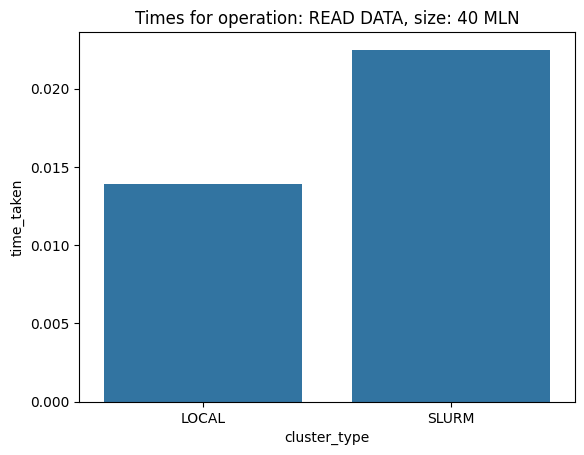

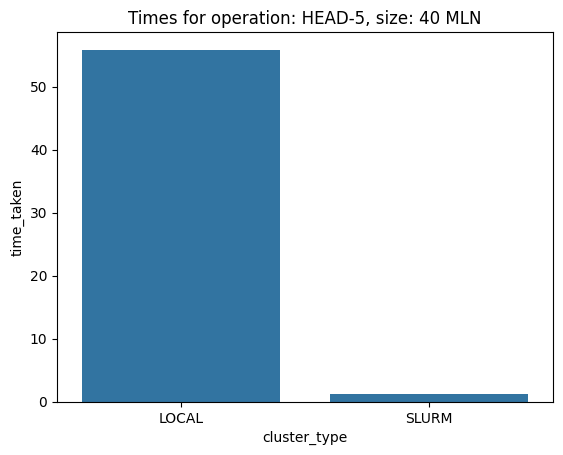

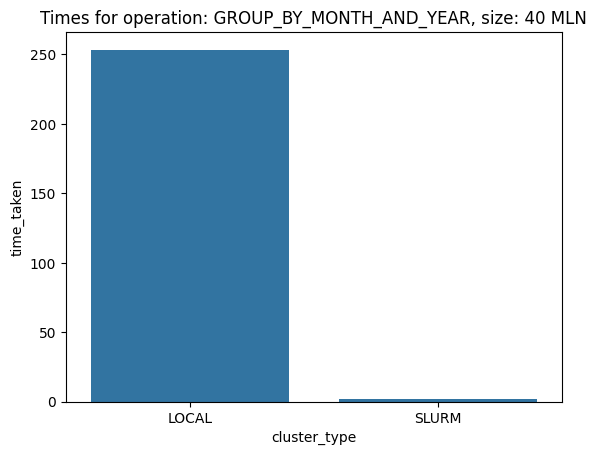

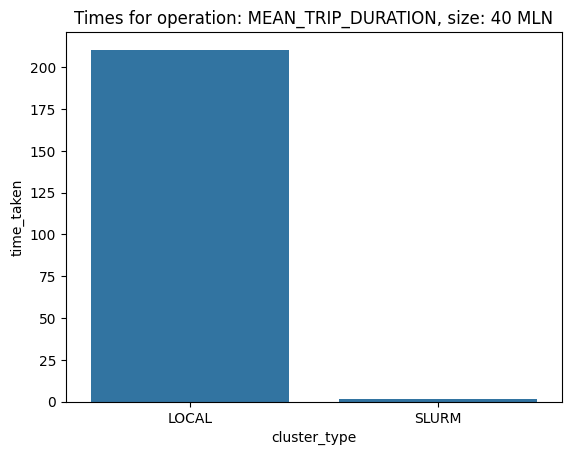

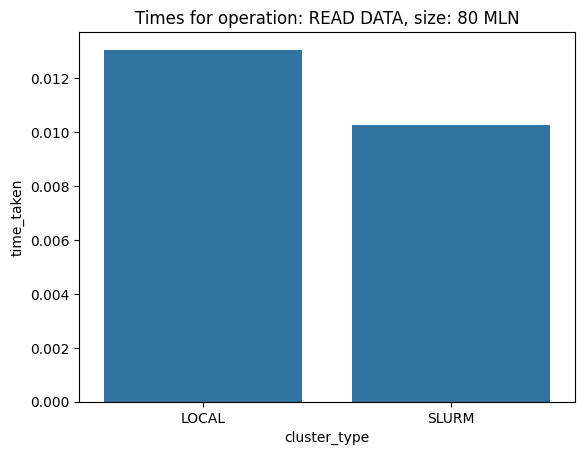

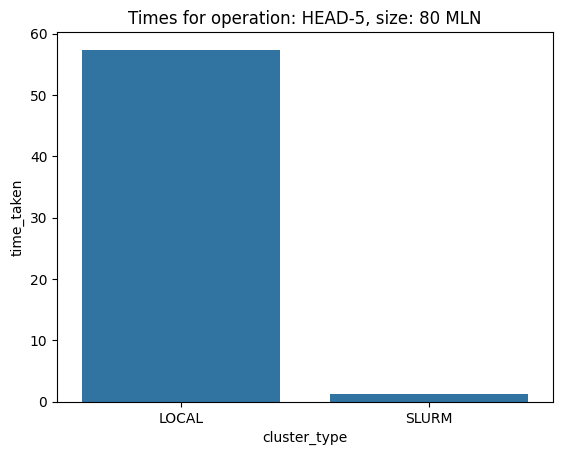

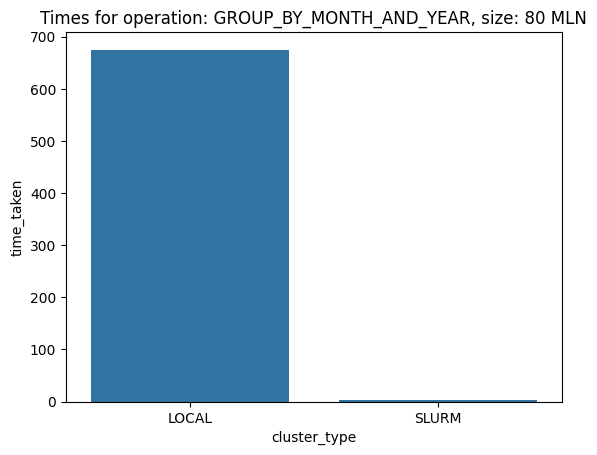

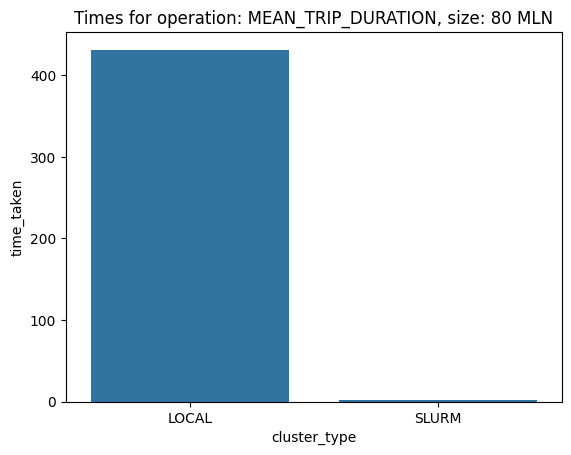

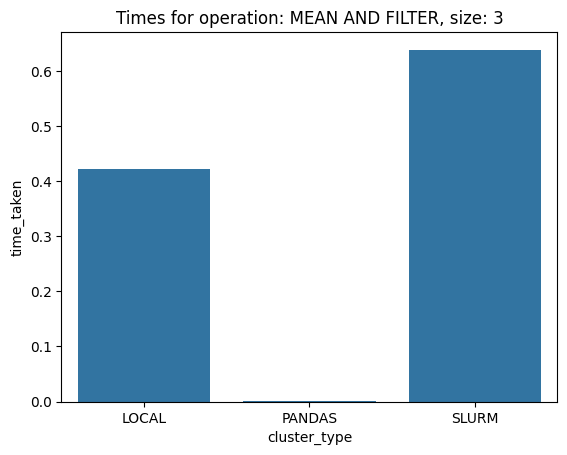

In [26]:
for size in results['input_size'].unique():
    for operation in results['operation'].unique():
        subset = results[(results['operation'] == operation) &
                                 (results['input_size'] == size)]
        if len(subset) != 0:
            plt.figure()
            plt.title(f'Times for operation: {operation}, size: {size}')
            sns.barplot(data=subset, x='cluster_type', y='time_taken', errorbar=None)
            plt.show()

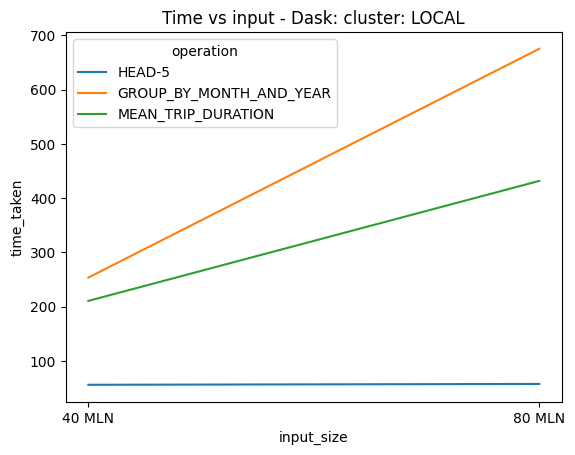

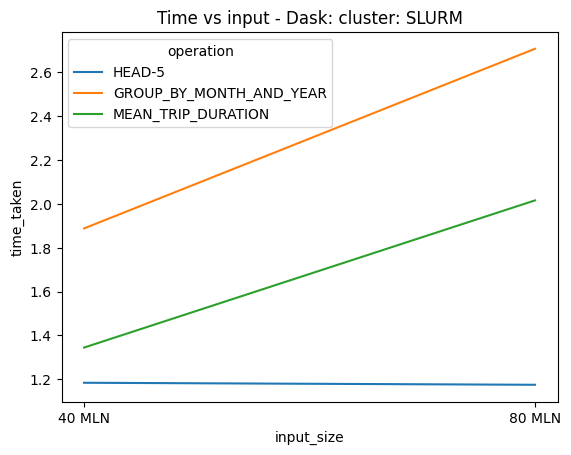

In [39]:
filtered = results[(results['cluster_type'] != 'PANDAS') 
                   & (results['operation'] != 'READ DATA')
                   & (results['input_size'] != "3")
                   ]

for cluster in filtered['cluster_type'].unique():
    plt.figure()
    plt.title(f'Time vs input - Dask: cluster: {cluster}')
    sns.lineplot(data=filtered[filtered['cluster_type'] == cluster], x="input_size", y="time_taken", hue="operation")
    plt.show()